In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

import joblib  # model 저장용

In [4]:
def show_IMG(img, label):
    # plt.imshow(img)  # 이렇게 출력하면 보라색, 노란색 휘황찬란하게 나옴
    plt.imshow(255-img, cmap="gray")  # 이미지 반전 후 흑백으로 출력하기
    print(label)
    plt.show()

In [5]:
def show_data_values(label):
    count_value = np.bincount(label)
    print(count_value)

    plt.bar(np.arange(0, 10), count_value)
    plt.xticks(np.arange(0, 10))
    plt.grid()
    plt.show()

In [7]:
path = "D:/Kamie/dataset/mnist.npz"   # npz = numpy zip
(train_set, train_label), (test_set, test_label) = tf.keras.datasets.mnist.load_data(path)

# train, test set 확인해보기 
### ▶ train set

In [8]:
train_set.shape

(60000, 28, 28)

In [9]:
train_set[0].shape

(28, 28)

In [10]:
train_set[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


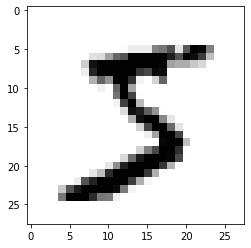

In [18]:
show_IMG(train_set[0],train_label[0])

In [11]:
train_set[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [12]:
type(train_set[0][0][0])

numpy.uint8

In [13]:
train_label.shape

(60000,)

In [14]:
train_label[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### ▶ test set

In [15]:
test_set.shape

(10000, 28, 28)

In [16]:
test_label.shape

(10000,)

## 레이블 개수 확인
분류 문제일 때 개수 확인하는 게 좋음. 한쪽으로 치우치면 치우친 쪽, 많은 쪽으로 학습함

In [19]:
type(train_label)

numpy.ndarray

[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


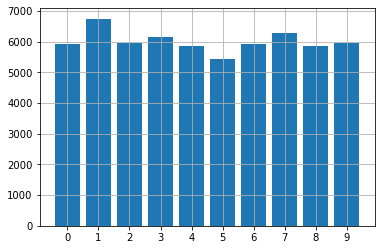

[ 980 1135 1032 1010  982  892  958 1028  974 1009]


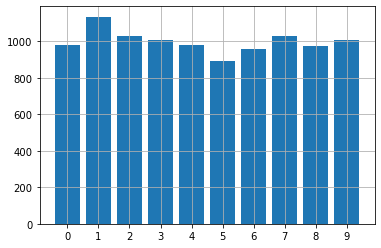

In [20]:
show_data_values(train_label)
show_data_values(test_label)

# RandomForestClassifier로 학습하기

In [21]:
clf = RandomForestClassifier()
clf.fit(train_set, train_label)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [22]:
# 1차원으로 펴주고 쉐입 맞춰주기. 아니면 위와 같은 에러 발생
train_set = train_set.reshape(len(train_set), 784)  # 784 = 28*28

# model 저장하기 : 학습할 때만 사용
저장해두면 나중에 다시 학습fit 안해도 됨
- 이 부분 함수로?

# 저장한 model 불러오기

In [26]:
clf = joblib.load("220502_rf_mnist.pkl")

In [29]:
print(clf.predict(train_set[0:1]))
# train_set[0] 하면 1차원으로 인식해서 shape 에러 뜸
# train_set[0:1] 하면 2차원으로 인식

[5]


# test_set도 train_set과 shape 맞춰서 ㄱㄱ

In [30]:
test_set = test_set.reshape(len(test_set), 784)

In [31]:
clf.score(test_set, test_label)

0.9692

---
# HW : 왜 틀렸는지 출력
- 모델에 테스트 데이터 하나씩 넣었을 때 틀린 값 출력하기
- 데이터 값과 내 모델이 예측한 값 출력하기
- 틀리면 멈추라고?